# **Israel Elections Data Analysis**

An example notebook showing how to read and display the Israel 2020 elections results. 

In [1]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')

import sys

Running locally on Jupyter


In [2]:
# First install tha needed packages using conda in the current Jupyter kernel
# Run once - should take a long time!

#if not(run_in_colab):
#  !conda install --yes --prefix {sys.prefix} numpy
#  !conda install --yes --prefix {sys.prefix} pandas
#  !conda install --yes --prefix {sys.prefix} matplotlib
#  !conda install --yes --prefix {sys.prefix} statsmodels  # statistical modelling 
#  !conda install --yes --prefix {sys.prefix} xlrd  # read excel 
#  !conda install --yes --prefix {sys.prefix} scikit-learn


# Alternatively, if your python wasn't installed using anaconda, we can use pip install: 
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib


In [3]:
# Import modules 
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)


First, we need to mount our local drive to the colab network

In [4]:
# Mount drive in google colab
if run_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')
else:  # Set local path 
    data_path = "C:/Users/Or Zuk/Google Drive/HUJI/Teaching/Lab_52568/Data/Elections/"  


In [5]:
# Loading elections 2020 elections data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

In [6]:
from elections_functions import * # import from local file
import io

data_type = "city" # "ballot"  # city
df_2020, df_2020_raw = read_election_results("2020", "city", run_in_colab)

# Dataset is now stored in a Pandas Dataframe
print(df_2020_raw.columns)
df_2020.head()

Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ג',
       'ודעם', 'ז', 'זך', 'זץ', 'טב', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כן', 'ל', 'מחל', 'נ', 'נז', 'ני', 'נץ', 'נק', 'פה', 'ףז', 'ץ', 'ק',
       'קי', 'קך', 'קץ', 'שס', 'Unnamed: 37'],
      dtype='object')


,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,...,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,13,0,554,0,0,0,0,0,1,0,...,0,0,8,2,0,0,0,0,2,2
אבו גוש,75,4,2157,0,0,0,5,0,0,5,...,3,2,123,0,2,0,0,1,4,14
אבו סנאן,92,6,4458,0,1,0,16,1,2,13,...,3,3,752,0,2,2,1,2,4,247
אבו עבדון שבט,0,0,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
אבו קורינאת שבט,9,0,1263,0,0,0,1,0,0,3,...,1,0,33,0,2,1,0,2,1,0


In [7]:
df_2020.describe()


,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,...,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.0,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,200.612531,215.210223,464.492993,2.603462,0.158285,0.0,175.871393,0.236603,0.234955,0.528442,...,14.591921,0.474856,925.435284,0.850783,0.459192,0.742786,0.342127,0.519373,1.061830,271.713932
std,1326.816330,2551.099158,2159.585435,14.607919,0.832314,0.0,855.339964,1.566748,1.146108,2.208271,...,71.550653,1.747342,5246.613547,4.209450,2.167345,3.353702,1.505495,2.050677,4.566917,1830.697472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.000000,1.000000,2.000000,0.000000,0.000000,0.0,12.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,134.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,98.000000,6.000000,7.000000,1.000000,0.000000,0.0,47.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,290.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
max,38808.000000,63782.000000,33145.000000,319.000000,10.000000,0.0,20701.000000,29.000000,17.000000,29.000000,...,1784.000000,19.000000,128637.000000,77.000000,35.000000,51.000000,19.000000,29.000000,79.000000,44649.000000


In [8]:
df_2020.iloc[5]

אמת       9
ג         0
ודעם    264
ז         0
זך        0
זץ        0
טב        1
י         0
יז        0
ינ        0
יף        0
יק        0
יר        0
כ         0
כן        0
ל         0
מחל       3
נ         0
נז        0
ני        0
נץ        0
נק        0
פה       52
ףז        0
ץ         2
ק         0
קי        0
קך        0
קץ        0
שס        0
Name: אבו קרינאת יישוב, dtype: int64

In [13]:
df_2020.loc['הרצליה']

אמת      4796
ג         675
ודעם      235
ז          58
זך          3
זץ          0
טב       1548
י           1
יז          1
ינ          1
יף          3
יק          2
יר          6
כ           7
כן          6
ל        2301
מחל     14894
נ          43
נז          9
ני          2
נץ        116
נק          2
פה      28206
ףז         12
ץ           4
ק           5
קי          3
קך          3
קץ         13
שס       1878
Name: הרצליה, dtype: int64

Now let's do some plotting

<AxesSubplot:>

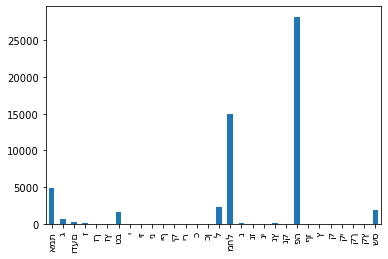

In [14]:
from matplotlib import pyplot as plt
df_2020.loc['הרצליה'].plot.bar()

<AxesSubplot:>

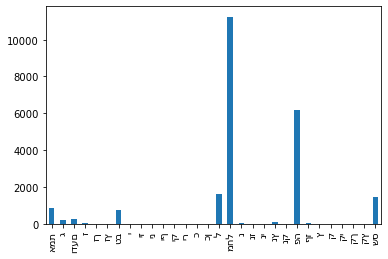

In [21]:
df_2020.loc['אילת'].plot.bar()

Next, we create a function for showing a bar plot of the voting **percentage** in a given city, while showing only the parties above a % threshold 

<AxesSubplot:>

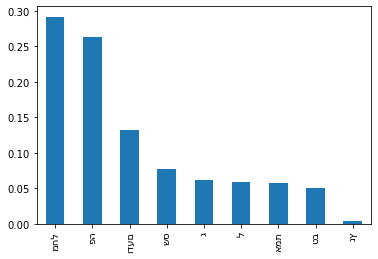

In [10]:
# Compute votes share only for parties above a certain threshold 

total_votes = parties_votes(df_2020, 0.001)  # total votes for each party
total_votes.plot.bar()



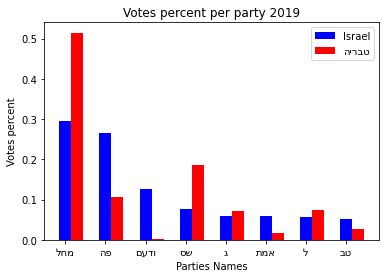

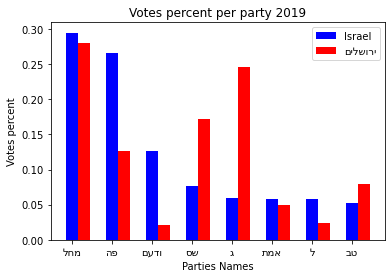

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Votes percent per party 2019'}, xlabel='Parties Names', ylabel='Votes percent'>)

In [15]:
# Bar plot for a party, only showing values above a certain threshold
party_bar(df_2020, 0.0325, 'טבריה')
party_bar(df_2020, 0.0325, 'ירושלים')

Show histogram of number of votes for a party 


<AxesSubplot:>

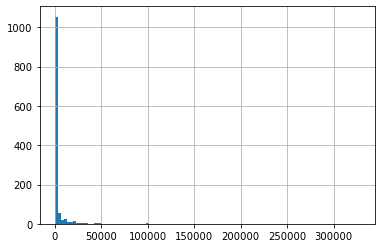

In [204]:
df_2020_raw['כשרים'].hist(bins=100)

Find for a party the city with the strongest support

In [205]:
def find_top_city(df, party):

  votes_percent_per_city = df.div(df.sum(axis=1), axis=0)
  print(votes_percent_per_city[party].max())
  print(votes_percent_per_city[party].idxmax())

find_top_city(df_2020, 'מחל')
find_top_city(df_2020, 'פה')
find_top_city(df_2020, 'ג')
find_top_city(df_2020, 'ודעם')

0.8726591760299626
שדי תרומות
0.7797927461139896
עין יהב
0.9672131147540983
קוממיות
1.0
אבו עבדון שבט


Next, we want to compare two parties

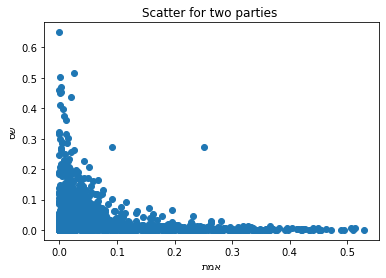

In [17]:
two_parties_scatter(df_2020, "אמת", "שס")

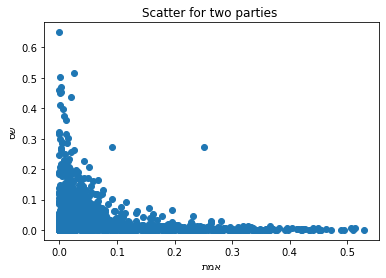

In [18]:
party_party_scatter(df_2020, "אמת", "שס")

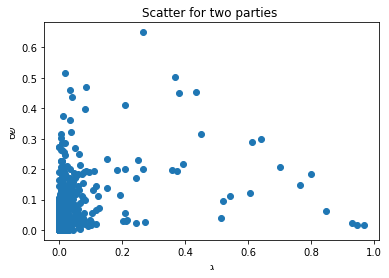

In [208]:
two_parties_scatter(df_2020, "ג", "שס")

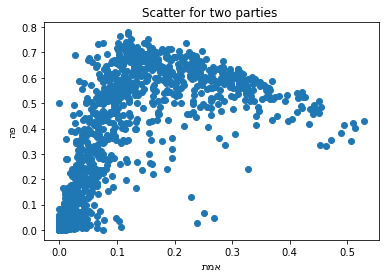

In [87]:
two_parties_scatter(df_2020, "אמת", "פה")

In [209]:
# Check sum of eligible votes 
df_2020.sum(axis=1) - df_2020_raw['כשרים'] 

שם ישוב
אבו גווייעד שבט     0
אבו גוש             0
אבו סנאן            0
אבו עבדון שבט       0
אבו קורינאת שבט     0
                   ..
תקומה               0
תקוע                0
תראבין אצאנע שבט    0
תראבין אצאנעישוב    0
תרום                0
Length: 1214, dtype: int64

Compute pairwise correlations between parties:

In [211]:
df_2020.shape

(1214, 30)

In [210]:
parties_corr = df_2020.corr()
print(parties_corr)

           אמת         ג      ודעם         ז        זך  זץ        טב  \
אמת   1.000000  0.304462  0.270346  0.875118  0.702850 NaN  0.696774   
ג     0.304462  1.000000  0.085095  0.344568  0.362572 NaN  0.556217   
ודעם  0.270346  0.085095  1.000000  0.281739  0.336982 NaN  0.218383   
ז     0.875118  0.344568  0.281739  1.000000  0.817508 NaN  0.879671   
זך    0.702850  0.362572  0.336982  0.817508  1.000000 NaN  0.771325   
זץ         NaN       NaN       NaN       NaN       NaN NaN       NaN   
טב    0.696774  0.556217  0.218383  0.879671  0.771325 NaN  1.000000   
י     0.587854  0.291903  0.221886  0.700717  0.787504 NaN  0.606822   
יז    0.745184  0.338655  0.344909  0.941494  0.791830 NaN  0.862904   
ינ    0.320324  0.164336  0.867100  0.430977  0.444321 NaN  0.382364   
יף    0.587325  0.332086  0.387211  0.675577  0.750056 NaN  0.693018   
יק    0.623761  0.593927  0.323269  0.735350  0.780575 NaN  0.806887   
יר    0.754937  0.384407  0.353622  0.879396  0.853241 NaN  0.81

Show heatmap of the correlation matrix: 


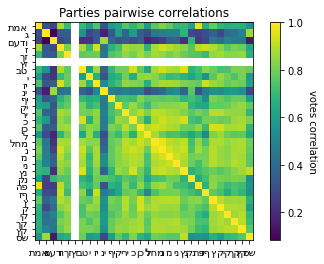

In [212]:
# need to extract only top 8 parties 
heatmap_corr(parties_corr, list(parties_corr.columns))

Create a dictionary mapping parties names to voting letters

In [213]:
parties_dict_2020 ={'אמת' : "עבודה גשר מרצ", 'ג' : "יהדות התורה", 'ודעם'  : "הרשימה המשותפת", 'טב'  : "ימינה", 'נץ'  : "עוצמה יהודית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "כחול לבן", 'שס'  : "שס"}
print(parties_dict_2020["טב"])
print(parties_dict_2020["ג"])
print(parties_dict_2020["ודעם"])


ימינה
יהדות התורה
הרשימה המשותפת


Read the election results by ballot (not city)

In [214]:
df_2020_ballots_raw = pd.read_csv(data_path + 'votes per ballot 2020.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020_ballots_raw.head()

,סמל ועדה,ברזל,סמל ישוב,קלפי,ריכוז,שופט,בזב,מצביעים,פסולים,כשרים,...,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 41
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,18,9870,967,1.0,1,0,585,126,2,124,...,0,6,1,0,0,0,0,0,2,NaN
אבו גווייעד שבט,18,9871,967,2.0,1,0,764,249,2,247,...,0,0,0,0,0,0,0,2,0,NaN
אבו גווייעד שבט,18,9872,967,3.0,1,0,669,220,2,218,...,0,2,1,0,0,0,0,0,0,NaN
אבו גוש,2,736,472,1.0,1,0,530,299,7,292,...,0,11,0,0,0,0,0,0,2,NaN
אבו גוש,2,737,472,2.0,1,0,693,388,6,382,...,0,18,0,0,0,0,0,1,0,NaN


In [28]:
df_2020_ballots = df_2020_ballots_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020_ballots = df_2020_ballots[df_2020_ballots.columns[8:-1]] # removing "metadata" columns
df_2020_ballots.head()

,כשרים,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,...,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,124,2,0,112,0,0,0,0,0,0,...,0,0,6,1,0,0,0,0,0,2
אבו גווייעד שבט,247,6,0,235,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
אבו גווייעד שבט,218,5,0,207,0,0,0,0,0,1,...,0,0,2,1,0,0,0,0,0,0
אבו גוש,292,15,1,229,0,0,0,0,0,0,...,0,0,11,0,0,0,0,0,0,2
אבו גוש,382,6,0,330,0,0,0,0,0,0,...,0,0,18,0,0,0,0,0,1,0


<AxesSubplot:>

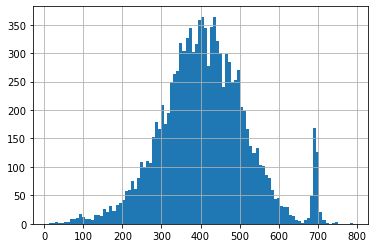

In [215]:
df_2020_ballots_raw['כשרים'].hist(bins=100)

In [217]:
df_2020_ballots_raw.shape

(11179, 41)

In [216]:
51922 * 111344 / 84846

68137.6042241237

A small example showing both corrections:
2 parties, with 3 cities. Two different models of voting turnout. Can we correct for them? 
i. Suppose turnout for cities is: party D is 70%, 100%, 50%
ii. Suppose turnout for party D is V_D=100% and turnout for party R is V_R=50%. 

In [220]:
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)
N_tilde = pd.DataFrame(np.array([[10, 10], [20, 10], [10, 20]]),
                   columns=['D', 'R'])



In [221]:
# Suppose voting turnout is by city: 70%, 100%, 50% 
N = pd.DataFrame(np.array([[7, 7], [20, 10], [5, 10]]),
                   columns=['D', 'R'])
q = N_tilde.sum() / N_tilde.sum().sum()
print("Population:")
print(q)
p = N.sum() / N.sum().sum()
print("Election:")
print(p)
v = N.sum(axis=1) / N_tilde.sum(axis=1)
print("Turnout by city:")
print(v)
p, q_hat = simple_turnout_correction(N, v)
print("Correction 1:")
print(q_hat)



Population:
D    0.5
R    0.5
dtype: float64
Election:
D    0.542373
R    0.457627
dtype: float64
Turnout by city:
0    0.7
1    1.0
2    0.5
dtype: float64
Correction 1:
D    0.5
R    0.5
dtype: float64


In [222]:
# Suppose voting turnout is by party: (D: 100%, R: 50%)
N = pd.DataFrame(np.array([[10, 5], [20, 5], [10, 10]]),
                   columns=['D', 'R'])
q = N_tilde.sum() / N_tilde.sum().sum()
print("Population:")
print(q)
p = N.sum() / N.sum().sum()
print("Election:")
print(p)
v = N.sum(axis=1) / N_tilde.sum(axis=1)
print("Turnout by city:")
print(v)
p, q_hat = simple_turnout_correction(N, v)
print("Correction 1:")
print(q_hat)



Population:
D    0.5
R    0.5
dtype: float64
Election:
D    0.666667
R    0.333333
dtype: float64
Turnout by city:
0    0.750000
1    0.833333
2    0.666667
dtype: float64
Correction 1:
D    0.654167
R    0.345833
dtype: float64


In [224]:
# Run turnout corrections: 
turnout = df_2020_raw['כשרים'] / df_2020_raw['בזב']
p,q_hat = simple_turnout_correction(df_2020, turnout)
#print(p)
#print(q_hat)

Read data for socio economic status

In [225]:
import os
# Load in jupyter. In collab you need to upload the file first 
DEM_PATH = 'C:/Users/Or Zuk/Google Drive/HUJI/Teaching/Lab_52568/Data/Demographics'
# Old file:
df_hev = pd.read_table(os.path.join(DEM_PATH, r'HevratiCalcaliYeshuvim.txt'), index_col='רשות מקומית').sort_index()  # , encoding='utf-8')
df_hev.head()
#df_hev.describe()

,סוג רשות,מחוז,דירוג,אוכלוסייה[1],דירוג.1,שטח שיפוט,דירוג.2,צפיפות[2],דירוג.3,מדד ג'יני[2],מדד חברתי-,דירוג.4,מספר יישובים
רשות מקומית,,,,,,,,,,,,,
אבו גוש,מועצה מקומית,ירושלים,196,"7,543",237,"1,900",48,"3,842",245,0.3402,3,NaN,NaN
אבו סנאן,מועצה מקומית,הצפון,132,"13,915",169,"6,660",108,"2,057",181,0.3799,3,NaN,NaN
אבן יהודה,מועצה מקומית,המרכז,132,"13,700",148,"8,250",136,"1,661",6,0.4987,8,NaN,NaN
אום אל-פחם,עירייה,חיפה,33,"55,182",71,"26,060",105,"2,080",168,0.3846,2,NaN,NaN
אופקים,עירייה,הדרום,70,"29,021",124,"10,240",77,"2,715",181,0.3799,3,NaN,NaN


In [226]:
# New file: 
# df_soc_eco = pd.read_csv(os.path.join(DEM_PATH, r'hevrati_calcali_set.csv'), index_col='set_code') # , encoding='utf-8')
df_soc_eco = pd.read_excel(os.path.join(DEM_PATH, r'hevrati_calcali_set.xlsx'), index_col='set_code').sort_index()  # 'iso-8859-8',# , encoding='utf-8')
df_soc_eco.head()


,name,population,index_value,eco_level
set_code,,,,
7,שחר,838.0,0.565,7
10,תירוש,474.0,-0.411,4
11,"ניר ח""ן",503.0,1.109,8
13,חצבה,566.0,0.676,7
15,נועם,358.0,-0.282,4
